# Régression Logistique Bayésienne

In [1]:
import pymc as pm, pandas as pd, seaborn
%matplotlib inline

In [2]:
df = pd.read_csv("TestRegLog",index_col=0)
df.head()

,is completed,is succeeded,score,question number,duration,success,is user author,delta approximate real duration
3671,0,0,0.0,0,569.854004,0,0,30.145996
3672,0,0,0.0,0,77.961998,0,0,522.038002
3673,0,0,0.0,0,47.632000,0,0,552.368000
3674,0,0,0.0,0,12.479000,0,0,587.521000
3675,0,0,0.0,1,3.110000,0,0,596.890000


In [3]:
x1 = df["is completed"]
x2 = df["is succeeded"]
x3 = df["score"]
x4 = df["question number"]
x5 = df["duration"]
x7 = df["is user author"]
x8 = df["delta approximate real duration"]

### hyperpriors
tau = pm.Gamma('tau', 1.e-3, 1.e-3, value=10.)
sigma = pm.Lambda('sigma', lambda tau=tau: tau**-.5)

### parameters
# fixed effects
beta0 =  pm.Normal('beta0',  0., 1., value=0.)
betacomp =  pm.Normal('betacomp',  0., 1., value=0.) 
betaissucc =  pm.Normal('betaissucc',  0., 1., value=0.)
betascore = pm.Normal('betascore',  0., 1., value=0.)
betaqnum = pm.Normal('betaqnum',  0., 1., value=0.)
betadur = pm.Normal('betadur',  0., 1., value=0.)
betaisua = pm.Normal('betaisua',  0., 1., value=0.)
betadelta = pm.Normal('betadelta',  0., 1., value=0.)

# expected parameter
logit_p =  (beta0 + betacomp*x1 + betaissucc*x2 + betascore*x3 + betaqnum*x4 + betadur*x5 + betaisua*x7 + betadelta*x8)


In [4]:
import pymc as pm

@pm.observed
def y(logit_p=logit_p, value=df["success"]):
    return pm.bernoulli_like(df["success"], pm.invlogit(logit_p))

In [5]:
m = pm.MCMC(locals())

In [ ]:
m.sample(10000, 5000, 5)

 [-----------------84%-----------       ] 8400 of 10000 complete in 48.9 sec

Plotting betaWater
Plotting beta0
Plotting betaSandwich
Plotting sigma


ValueError: range parameter must be finite.

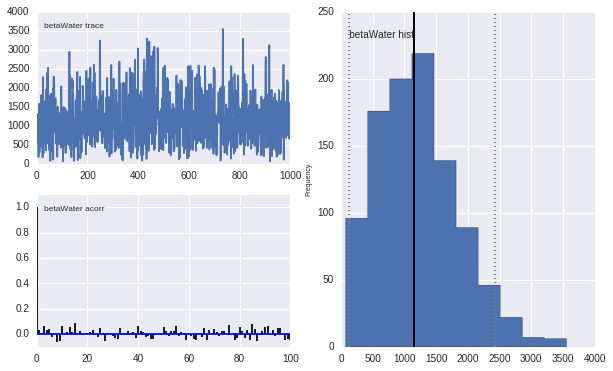

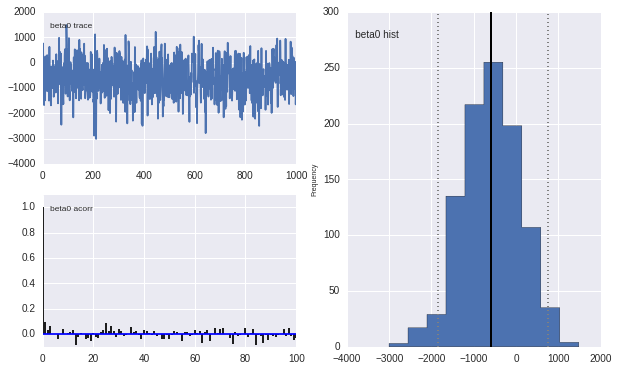

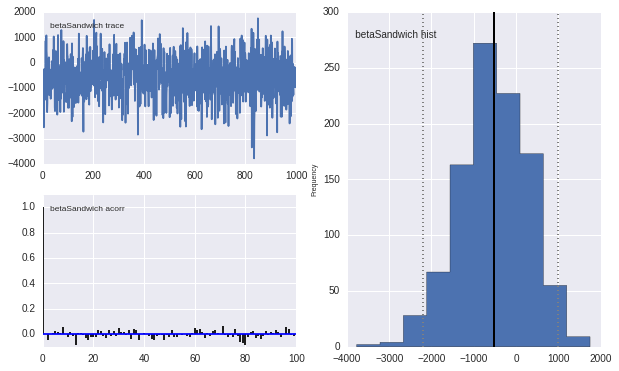

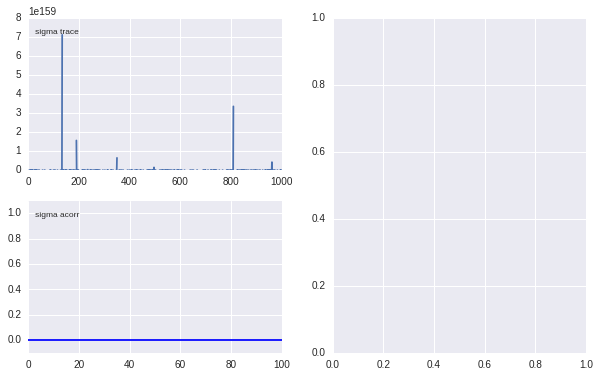

In [8]:
pm.Matplot.plot(m)